In [52]:
import pandas as pd
import igraph as ig
import numpy as np

In [53]:
edges = pd.read_csv('edge_df-1pWjP9QNLcg.csv', index_col=0)
vertices = pd.read_csv('vertex_df-1pWjP9QNLcg.csv', index_col=0)

In [54]:
edges_with_destination = edges[~edges['dest_scraped'].isna()]
print(edges_with_destination.shape)
edges_with_destination.head()

(300, 11)


,comment_id,threath_id,time,kind,author,dest,likes,num_replies,text,video_id,destId
79,Ugx3EjEUzELcXnsK31N4AaABAg.9sX97TmU1WT9sZYrN-tkSX,Ugx3EjEUzELcXnsK31N4AaABAg,2023-07-24T21:02:34Z,youtube#comment,UCC35EnAeuy4lLGTjIQHuLTQ,ChristenDOM? helemaal,1,NaN,@ChristenDOM? helemaal mee eens!,1pWjP9QNLcg,UCOtHqJeZ2OG0FrJRUOwaieg
80,Ugx3EjEUzELcXnsK31N4AaABAg.9sX97TmU1WT9suqvucIUih,Ugx3EjEUzELcXnsK31N4AaABAg,2023-08-02T12:52:30Z,youtube#comment,UCEngHxSN_kcZYoavVA4i7Ow,ChristenDOM?Christendom is,0,NaN,​​@ChristenDOM?Christendom is een joodse sect ...,1pWjP9QNLcg,UCOtHqJeZ2OG0FrJRUOwaieg
91,UgyEkmq44td6yWcDbmp4AaABAg.9sWKNWsWV679sWvdXCgzpQ,UgyEkmq44td6yWcDbmp4AaABAg,2023-07-23T20:32:40Z,youtube#comment,UCk7p83NSuNlDbT3eArf67Yw,Alf Brans,0,NaN,@Alf Brans alias de prutspapegaai,1pWjP9QNLcg,UCEkx7zzpb9N6DAnz6v7Tz7A
92,UgyEkmq44td6yWcDbmp4AaABAg.9sWKNWsWV679sZKcPATFx-,UgyEkmq44td6yWcDbmp4AaABAg,2023-07-24T18:58:11Z,youtube#comment,UCOtHqJeZ2OG0FrJRUOwaieg,Alf Brans,0,NaN,@Alf Brans ok,1pWjP9QNLcg,UCEkx7zzpb9N6DAnz6v7Tz7A
97,Ugz5eerHs-tU206lvrp4AaABAg.9sW6TWAFi3I9snQNMCIhs5,Ugz5eerHs-tU206lvrp4AaABAg,2023-07-30T15:37:02Z,youtube#comment,UCFPb9eToj2c4JlktoX6Ki5A,Alf Brans,1,NaN,@Alf Brans Beide dragen toch een onderbroek of...,1pWjP9QNLcg,UCEkx7zzpb9N6DAnz6v7Tz7A


In [55]:
edges_with_destination['from.To'] = edges_with_destination['author_id'] + '.' + edges_with_destination['dest_id'] # new column

/var/folders/y7/_zszvpn176l12y354k0l6t6c0000gn/T/ipykernel_81360/871815454.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edges_with_destination['from.To'] = edges_with_destination['author'] + '.' + edges_with_destination['destId'] # new column


In [56]:
unique_edges_with_destination = edges_with_destination.drop_duplicates(subset=['from.To'])

In [59]:
unique_edges_with_destination = unique_edges_with_destination[~unique_edges_with_destination['destId'].isna()]
unique_edges_with_destination.isna().sum()

comment_id       0
threath_id       0
time             0
kind             0
author           0
dest             0
likes            0
num_replies    190
text             0
video_id         0
destId           0
from.To          0
dtype: int64

IGRAPH DN-- 514 190 -- 
+ attr: name (v)


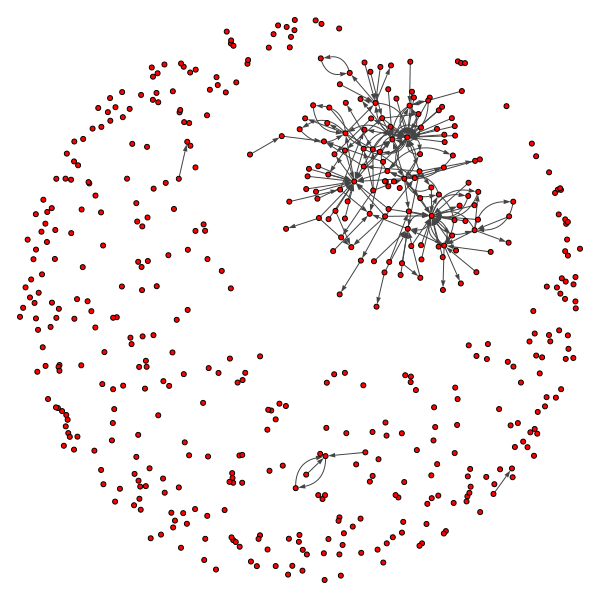

In [66]:
senderReceiver = zip(unique_edges_with_destination['author'], unique_edges_with_destination['destId'])

edgelist = []
for author, dest in senderReceiver:
    edgelist.append((author, dest))

unique_vertices = vertices['author_id'].unique()
verticelist = list(unique_vertices)

mygraph = ig.Graph(directed=True)
mygraph.add_vertices(verticelist)
mygraph.add_edges(edgelist)

print(mygraph.summary())

# make the layout of the edges in the plot more ordered
ig.plot(mygraph, layout="kamada_kawai", vertex_size=5, edge_arrow_size=0.5)

In [84]:
# Example usage:
import datetime
date_time = datetime.datetime.now().strftime("%H:%M %d/%m/%Y")
# getting the time and date in the format hour:minutes day/month/year
date_time = date_time.strftime("%H:%M %d/%m/%Y")
print(date_time)


11:40 19/10/2023
